### ニューラルネットワーク Neural Network

#### 活性化関数
* 入力信号の総和を出力信号(0 or 1?)に変換する関数．活性化関数は入力信号の総和がどのように活性化するか(どのように発火するか)ということを決定する役割がある．
* パーセプトロンでは活性化関数にステップ関数(閾値を境にして出力が切り替わる関数)を利用している．

#### シグモイド関数
$$
h(x) = \frac{1}{1 + \exp(-x)}
$$
ニューラルネットワークでは活性化関数に支部も緯度関数を用いて信号の変換を行い，その変換された信号が次のニューロンに伝えられる．

In [1]:
# ステップ関数の実装
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
# 単純に実装するとこのようになるが，引数のxは実数(浮動小数点数)しか入力できないという問題あり
# つまり，Numpyの配列を引数に取るような使い方ができない
step_function(3.0)

1

In [ ]:
# ステップ関数の実装 (Numpy配列に対応)
def step_function(x):
    y = x > 0
    return y.astype(np.int)

上の関数はたったの2行だがNumpyの便利なトリックを使っているため，すこしわかりづらい

Numpy配列に対して不等号の演算を行うと，配列の各要素に対して不等号の演算が行われ，**ブーリアンの配列** が生成される．

今回の関数では$x$という配列の各要素に対して，0より大きい要素はTrueに，0以下の要素はFalseに変換され，新しい配列$y$が生成される．

ここで，$y$はブーリアン型の配列であるので，これを0か1の**int型**を出力する関数にしたい．

$\rightarrow$`astype()`メソッドを使う．このメソッドでは引数に，希望する型(今回は`np.int`型)を指定．

以下のコードで挙動を確認

In [2]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [3]:
y = x > 0
y

array([False,  True,  True])

In [10]:
y = y.astype(np.int) # ここでの注意文はint型を指定するときに，int32や，int64まで指定したほうが言い的なこと言ってる?
y

C:\Users\hr102\AppData\Local\Temp\ipykernel_37280\985487235.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int) # ここでの注意文はint型を指定するときに，int32や，int64まで指定したほうが言い的なこと言ってる?


array([0, 1, 1])

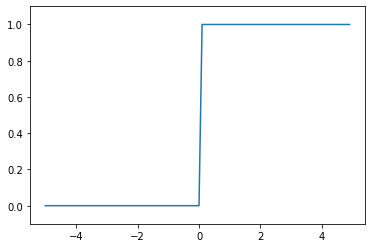

In [12]:
# ステップ関数のグラフ
import numpy as np
import matplotlib.pylab as plt # pylabってなんやねん → 色々入ってる便利モジュールだけどバグ多し？

def step_function(x):
    return np.array(x > 0, dtype=np.int32) # False, Trueにしてから，0,1に変換

x = np.arange(-5.0, 5.0, 0.1) # -5.0から5.0までの範囲を0.1刻みでNumpy配列を生成する
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

### シグモイド関数の実装

In [46]:
# シグモイド関数は次のように書ける．
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

この実装も単純だが，今回はNumpy配列を引数に入力しても結果は正しく表示される

シグモイド関数の実装がNumpy配列に対応していることは，Numpyのブロードキャストの機能に秘密がある．

ブロードキャスト機能により，スカラ値とNumpy配列での演算が行われると，スカラ値とNumpy配列の各要素同士で演算が行われるから

さっきのステップ関数は不等号演算をしていて，配列での不等号演算の結果はブーリアン型になるからNumpy配列に対応していなかった？

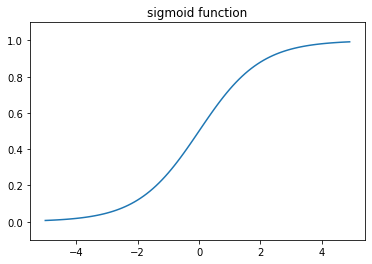

In [45]:
# シグモイド関数のグラフ

import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.title("sigmoid function")
plt.show()

### シグモイド関数とステップ関数の比較
#### 異なる点
* 滑らかさ．この滑らかさがニューラルネットワークの学習において重要な意味を持つ．
* ステップ関数が0か1かしか返さないのに対して，シグモイド関数は実数--0.731や0.880など--を返す

つまり，パーセプトロンではニューロン間を0か1の二値の信号が流れていたのに対してニューラルネットワークでは連続的な実数値の信号が流れる．

水に例えるとステップ関数は"ししおどし", シグモイド関数は"水車"：

ステップ関数が"ししおどし"のように，水を次へ流すか流さないかの動きをするのに対して，シグモイド関数は"水車"のように流れてきた水の量に比例して，次へ流す水の量を調整する．

#### 共通する性質
* 遠くから見ると，形は似ている：
つまり，ステップ関数とシグモイド関数は，入力信号が重要な情報であれば大きな値を出力し，入力信号が重要でなければ小さな値をしゅつりょくする．
* どんなに入力信号の値が大きくても，出力信号の値を0から1の間に押し込めるのも両者の共通点．
* 両者はともに非線形関数である．(そもそも関数は変換器であり，この変換器になにか入力したとき，出力が入力の定数倍になるような関数を線形関数という．そのため，線形関数は一本の直線になる)

ニューラルネットワークでは，活性化関数に線形関数を用いてはならない．線形関数を用いると，ニューラルネットワークで層を深くすることの意味がなくなってしまうから．(ここのp51の具体例わかりやすい)

### ReLU関数
古くからニューラルネットワークではシグモイド関数が一般的だったが，最近では**ReLU (Rectified Linear Unit)**という関数が主に用いられている．

ReLuは入力が０を超えていれば，その入力をそのまま出力し，０以下ならば０を出力する関数．

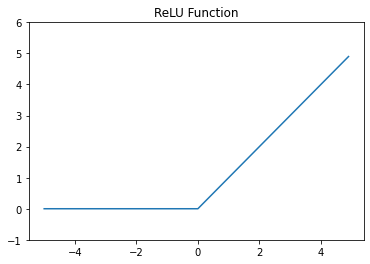

In [17]:
# ReLU関数の実装
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

# Numpyのmaximumという関数を使っている．
# maximum：入力された値から大きいほうの値を選んで出力する関数．

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 6.0)
plt.title("ReLU Function")
plt.show()

### 多次元配列の計算
Numpy の多次元配列を使った計算をマスターすれば，ニューラルネットワークの実装を効率的に進めれるよ！

In [1]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [2]:
np.ndim(A) # 配列の次元数の取得
# np.ndim()という関数

1

In [4]:
A.shape # 配列の形状の取得
# インスタンス変数の`shape`

# 結果がタプルになっていることに注意
# タプルの理由は１次元配列の場合も多次元配列の場合と同じ統一された結果を返すから

# これは4行1列だから縦ベクトル？？

(4,)

In [5]:
A.shape[0]

4

In [6]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [8]:
np.ndim(B)

2

In [9]:
B.shape

# Bは3×2の配列

(3, 2)

In [10]:
# 行列の積
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [11]:
B = np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [13]:
np.dot(A, B) # 行列の積の計算
# ドット積

array([[19, 22],
       [43, 50]])

#### 行列の計算をするときはそれぞれの配列の次元に注意する！！！

In [16]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([7,8])
A.shape

(3, 2)

In [17]:
B.shape

(2,)

In [18]:
np.dot(A, B)

array([23, 53, 83])

#### ニューラルネットワークの行列の積
図3-14の簡単なニューラルネットワークを対象とする

このニューラルネットワークは，バイアスと活性化関数は省略し，重みだけがあるものとした

実装に関しては$\rm{X}$, $\rm{W}$, $\mathrm{Y}$の形状に注意する．特に$\rm{X}$と，$\rm{W}$の対応する次元の要素数が一致していることが重要．

In [34]:
X = np.array([1, 2])
X.shape

(2,)

In [35]:
W = np.array([[1,3,5], [2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [36]:
W.shape

(2, 3)

In [37]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


以上で示したように`np.dot`(多次元配列のドット積)を使えばYの結果を1度に計算できる．

これが意味することは，もしYの要素数が100や1000であったとしても，1度の演算で計算できるということ！

もし，`np.dot`を使わなければ，Yの要素を一つずつ取り出して計算しなければならない(または，for文を使って計算をするひつようがある)．なるほど！賢い！！！

行列の積によって一度で計算ができるというテクニックは，実装上とても重要

### 3層ニューラルネットワークの実装
"実践的"なニューラルネットワークの実装

ここでは図3-15に示す，3層ニューラルネットワークを対象として，その入力から出力への処理(フォワード方向への処理)を実装する．

Numpy配列をうまく使うことでほんの少しのコードでニューラルネットワークのフォワード処理を完成させれる！

本節での重要な点：ニューラルネットワークの計算は行列の計算としてまとめて行える．ということ

#### やっぱりNumpy配列の計算ちょっと気持ち悪い...

In [43]:
# 式(3.9)の実装
# 入力信号，重み，バイアスは適当
import numpy as np
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3)
print(X.shape) # (2,)
print(B1.shape) # (3,)
# ここでもやはり，W1とXの対応する次元の要素数が一致している． 

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [48]:
# 活性化関数をh()で表し，ここではシグモイド関数を使う
# 活性化関数で変換された信号をｚで表す
# これをpythonで実装する

def sigmoid(x):  # この関数はNumpy配列を受け取り，同じ要素数を持つNumpy配列を返す
    return 1 / (1 + np.exp(-x)) 

Z1 = sigmoid(A1) # sigmoid()は既に定義した関数

print(A1)
print(Z1) 

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [50]:
# 続いて，第1層から第2層目までの実装 (図3-19)

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1. shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

# この実装は第1層の出力(Z1)が第2層への入力になっている点を除けば，さっきの実装と全く同じ！

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [54]:
# 最後に第2層から出力層(第3層)
def identity_function(x): # 恒等関数という．これを出力層の活性化関数として利用する．(必要はないがこれまでの流れと統一するため)
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # もしくはY = A3

print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


#### 実装のまとめ
ここまで行ってきた実装を,
別のファイル: `three_neural_network.py`にまとめて書いた

色々異なるテクニックで書かれているから要チェック！


In [59]:
# 動作確認
def init_network():
    network = {}  # リストではなく辞書を作ってる
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

init_network()

{'W1': array([[0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]]),
 'b1': array([0.1, 0.2, 0.3]),
 'W2': array([[0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]]),
 'b2': array([0.1, 0.2]),
 'W3': array([[0.1, 0.3],
        [0.2, 0.4]]),
 'b3': array([0.1, 0.2])}

### 3.5 出力層の設計
機械学習の問題は"分類問題"と"回帰問題"に大別できる．

#### 3.6 恒等関数とソフトマックス関数
ソフトマックスの出力は，全ての入力信号から矢印による結びつきがある．

式の分母からわかるように，出力の各ニューロンが，全ての入力信号から影響を受けることになるから．

In [3]:
 # ソフトマックス関数の実装

 import numpy as np
 
 a = np.array([0.3, 2.9, 4.0])
 exp_a = np.exp(a)
 print(exp_a)
 sum_exp_a = np.sum(exp_a) # 指数関数の和
 print(sum_exp_a)

 y = exp_a / sum_exp_a
 print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


#### 3.5.2 ソフトマックス関数の実装上の注意
ソフトマックス関数にはオーバーフローに関する欠陥がある．

オーバーフロー：コンピュータが表現できる数には有効桁数があり，大きすぎる値は表現できないという問題

大きな値同士で割り算を行うと，数値が不安定な結果になってしまう．

改善案
* Cという任意定数を分子と分母両方にかける．$\rightarrow$ 指数関数の中に何らかの定数を足し算（引き算）しても結果は変わらない．ということがわかる．
* オーバーフローの対策として，入力信号の中でさいだいの値を用いることが一般的．

In [7]:
# 改善案の具体例

a = np.array([1010, 1000, 990])
y = np.exp(a) / np.sum(np.exp(a)) # ソフトマックス関数の計算
print(y)
# array([nan, nan, nan]) と表示され，正しく計算されない

c = np.max(a) # 1010
y = a-c
print(y)

# オーバーフローしないように改善
y = np.exp(a-c) / np.sum(np.exp(a-c))
print(y)

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/var/folders/gm/v494qkh53y7bx3dh4j6dsgfc0000gn/T/ipykernel_3156/1697098949.py:4: RuntimeWarning: overflow encountered in exp
  y = np.exp(a) / np.sum(np.exp(a)) # ソフトマックス関数の計算
/var/folders/gm/v494qkh53y7bx3dh4j6dsgfc0000gn/T/ipykernel_3156/1697098949.py:4: RuntimeWarning: invalid value encountered in true_divide
  y = np.exp(a) / np.sum(np.exp(a)) # ソフトマックス関数の計算


In [6]:
# 3.5.3 ソフトマックス関数の特徴
def softmax(a):
    c = np.max(a) # オーバーフローを考慮
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y)) # softmax関数の出力の総和は１になる．

[0.01821127 0.24519181 0.73659691]
1.0


In [8]:
# softmax.pyファイルから関数を呼び出して実行したい．
import numpy as np
import softmax as sm

a = np.array([0.3, 2.9, 4.0])
y = sm.softmax(a)
print(y)

# if __name__ == '__main__':
#     main()

NameError: name 'np' is not defined

#### 3.5.3 ソフトマックス関数の特徴
softmax関数の出力の総和が１になる

このおかげでsoftmax関数の出力を確立として解釈することができる．

注意点：指数関数は単調増加する関数なので，softmax関数を適用しても各要素の大小関係は変化しない．

### 手書き数字認識



### 手書き数字認識
学習は完了したものとして，学習済みのパラメータを使って，ニューラルネットワークの推論処理だけを実装していく．(forward propagation)
#### 3.6.1 MNISTデータセット
mnist.pyはdeep-learning-from -scratchの中からしか使え無さそうなので，
以降“ch03”の中にファイルを作って，勉強続行した
